In [1]:
using Pkg
Pkg.activate(".../../../../")

  Activating project at `~/Glamdring/LimberJack.jl`


In [2]:
#using Turing
using LimberJack
using CSV
using NPZ
using YAML
using LinearAlgebra
using PythonCall
using ForwardDiff
using Plots
np = pyimport("numpy")
sacc = pyimport("sacc")

[ Info: Precompiling LimberJack [6b86205d-155a-4b14-b82d-b6a149ea78f2]
[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


Python module: <module 'sacc' from '/home/jaimerz/Glamdring/LimberJack.jl/.CondaPkg/env/lib/python3.11/site-packages/sacc/__init__.py'>

# Analytic Margninalization

In [3]:
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
wlwl_yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/wlwl.yml"
gcgc_yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/gcgc.yml"
nzs_path = "/home/jaimerz/Glamdring/LimberJack.jl/data/DESY1/nzs/"

wlwl_sacc_file = sacc.Sacc().load_fits(sacc_path)
gcgc_sacc_file = sacc.Sacc().load_fits(sacc_path)
wlwl_yaml_file = YAML.load_file(wlwl_yaml_path)
gcgc_yaml_file = YAML.load_file(gcgc_yaml_path)

nz_DESwl__0 = np.load(string(nzs_path, "nz_DESwl__0.npz"))
nz_DESwl__1 = np.load(string(nzs_path, "nz_DESwl__1.npz"))
nz_DESwl__2 = np.load(string(nzs_path, "nz_DESwl__2.npz"))
nz_DESwl__3 = np.load(string(nzs_path, "nz_DESwl__3.npz"))
                
nz_DESgc__0 = np.load(string(nzs_path, "nz_DESgc__0.npz"))
nz_DESgc__1 = np.load(string(nzs_path, "nz_DESgc__1.npz"))
nz_DESgc__2 = np.load(string(nzs_path, "nz_DESgc__2.npz"))
nz_DESgc__3 = np.load(string(nzs_path, "nz_DESgc__3.npz"))
nz_DESgc__4 = np.load(string(nzs_path, "nz_DESgc__4.npz"))                

Python NpzFile: <numpy.lib.npyio.NpzFile object at 0x7fc3cf189190>

In [4]:
gcgc_meta, gcgc_files = make_data(gcgc_sacc_file, gcgc_yaml_file;
                                  nz_DESgc__0=nz_DESgc__0,
                                  nz_DESgc__1=nz_DESgc__1,
                                  nz_DESgc__2=nz_DESgc__2,
                                  nz_DESgc__3=nz_DESgc__3,
                                  nz_DESgc__4=nz_DESgc__4);

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
using custom nz for nz_DESgc__0
using custom nz for nz_DESgc__1
using custom nz for nz_DESgc__2
using custom nz for nz_DESgc__3
using custom nz for nz_DESgc__4


In [5]:
wlwl_meta, wlwl_files = make_data(wlwl_sacc_file, wlwl_yaml_file;
                                  nz_DESwl__0=nz_DESwl__0,
                                  nz_DESwl__1=nz_DESwl__1,
                                  nz_DESwl__2=nz_DESwl__2,
                                  nz_DESwl__3=nz_DESwl__3);

DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24
using custom nz for nz_DESwl__0
using custom nz for nz_DESwl__1
using custom nz for nz_DESwl__2
using custom nz for nz_DESwl__3


## T-Matrices wlwl

In [6]:
function model_cov_dz(x; meta=wlwl_meta, files=wlwl_files, cosmo=cosmo) 

    #cosmology.settings.cosmo_type = Real
    nuisances = Dict("A_IA" => 0,
                     "alpha_IA" => 0,

                     "DESwl__0_dz" => x[1],
                     "DESwl__1_dz" => x[2],
                     "DESwl__2_dz" => x[3],
                     "DESwl__3_dz" => x[4],
        
                     "DESwl__0_m" => 0.012,
                     "DESwl__1_m" => 0.012,
                     "DESwl__2_m" => 0.012,
                     "DESwl__3_m" => 0.012)
    
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [7]:
function model_cov_nz(DESwl__0_nz, DESwl__1_nz, DESwl__2_nz, DESwl__3_nz;
                      meta=wlwl_meta, files=wlwl_files, cosmo=cosmo) 

    #cosmology.settings.cosmo_type = Real
    nuisances = Dict("A_IA" => 0,
                     "alpha_IA" => 0,

                     "DESwl__0_nz" => DESwl__0_nz,
                     "DESwl__1_nz" => DESwl__1_nz,
                     "DESwl__2_nz" => DESwl__2_nz,
                     "DESwl__3_nz" => DESwl__3_nz,
        
                     "DESwl__0_m" => 0.012,
                     "DESwl__1_m" => 0.012,
                     "DESwl__2_m" => 0.012,
                     "DESwl__3_m" => 0.012)
    
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [8]:
function make_Cmod_dz(dz_cov; cosmo=cosmo)
    d = 0.00005
    n_cls = 240
    m  = 4
    T = zeros(n_cls, m)

    for i in 1:m
        dz = zeros(m)
        e = zeros(m)
        e[i] = d
        T[:, i] = (model_cov_dz(dz.+e; cosmo=cosmo) .- model_cov_dz(dz.-e; cosmo=cosmo)) ./ (2*d)
    end
    TPT = T * dz_cov * T'
    Cmod = Symmetric(wlwl_meta.cov + TPT)
    return Cmod
end

make_Cmod_dz (generic function with 1 method)

In [9]:
function make_Cmod_Nz(cov_k0, cov_k1, cov_k2, cov_k3; cosmo=cosmo)
    d = 0.005
    n_cls = 240
    m  = length(nz_0)
    println(m)
    T0 = zeros(n_cls, m)
    T1 = zeros(n_cls, m)
    T2 = zeros(n_cls, m)
    T3 = zeros(n_cls, m)

    for i in 1:m
        e = zeros(m)
        e[i] = d
        T0[:, i] = (model_cov_nz(nz_0.+e, nz_1, nz_2, nz_3; cosmo=cosmo) .- model_cov_nz(nz_0.-e, nz_1, nz_2, nz_3; cosmo=cosmo)) ./ (2*d)
        T1[:, i] = (model_cov_nz(nz_0, nz_1.+e, nz_2, nz_3; cosmo=cosmo) .- model_cov_nz(nz_0, nz_1.-e, nz_2, nz_3; cosmo=cosmo)) ./ (2*d)
        T2[:, i] = (model_cov_nz(nz_0, nz_1, nz_2.+e, nz_3; cosmo=cosmo) .- model_cov_nz(nz_0, nz_1, nz_2.-e, nz_3; cosmo=cosmo)) ./ (2*d)
        T3[:, i] = (model_cov_nz(nz_0, nz_1, nz_2, nz_3.+e; cosmo=cosmo) .- model_cov_nz(nz_0, nz_1, nz_2, nz_3.-e; cosmo=cosmo)) ./ (2*d)
    end
    TT0 = T0 * (cov_k0) * T0'
    TT1 = T1 * (cov_k1) * T1'
    TT2 = T2 * (cov_k2) * T2'
    TT3 = T3 * (cov_k3) * T3';
    Cmod = Symmetric(wlwl_meta.cov + TT0 + TT1 + TT2 + TT3)
    return Cmod
end

make_Cmod_Nz (generic function with 1 method)

In [10]:
nz_0 = pyconvert(Vector{Float64}, nz_DESwl__0["dndz"])
nz_1 = pyconvert(Vector{Float64}, nz_DESwl__1["dndz"])
nz_2 = pyconvert(Vector{Float64}, nz_DESwl__2["dndz"])
nz_3 = pyconvert(Vector{Float64}, nz_DESwl__3["dndz"]);

In [11]:
cov_k0 = pyconvert(Vector{Vector{Float64}}, nz_DESwl__0["cov"])
cov_k0 = Diagonal(permutedims(hcat(cov_k0...)))

cov_k1 = pyconvert(Vector{Vector{Float64}}, nz_DESwl__1["cov"])
cov_k1 = Diagonal(permutedims(hcat(cov_k1...)))

cov_k2 = pyconvert(Vector{Vector{Float64}}, nz_DESwl__2["cov"])
cov_k2 = Diagonal(permutedims(hcat(cov_k2...)))
    
cov_k3 = pyconvert(Vector{Vector{Float64}}, nz_DESwl__3["cov"])
cov_k3 = Diagonal(permutedims(hcat(cov_k3...)));

In [12]:
cosmo = Cosmology(0.30, 0.05, 0.67, 0.96, 0.81,
                  tk_mode="EisHu", 
                  Pk_mode="Halofit");

In [13]:
dz_cov = [0.017^2 0 0 0; 
          0 0.017^2 0 0;
          0 0 0.013^2 0;
          0 0 0 0.015^2]
C_mod = make_Cmod_dz(dz_cov; cosmo=cosmo)
inv_C_mod = inv(C_mod);

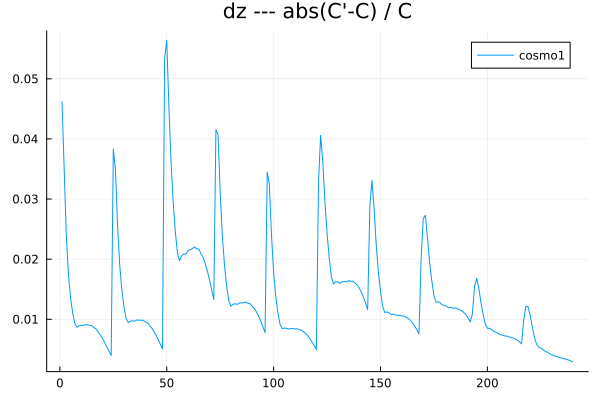

In [14]:
plot(abs.(diag(wlwl_meta.cov) .- diag(C_mod)) ./ diag(wlwl_meta.cov), label="cosmo1", title="dz --- abs(C'-C) / C")


In [15]:
npzwrite("../../data/DESY1/nzs/wlwl_dz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))

In [16]:
C_mod = make_Cmod_Nz(cov_k0, cov_k1, cov_k2, cov_k3; cosmo=cosmo)
inv_C_mod = inv(C_mod);

40


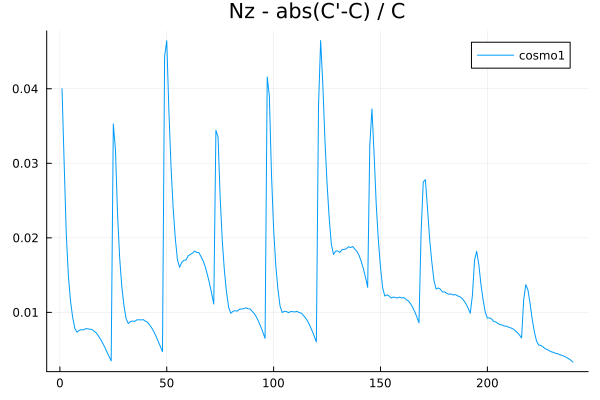

In [17]:
plot(abs.(diag(wlwl_meta.cov) .- diag(C_mod)) ./ diag(wlwl_meta.cov), label="cosmo1", title="Nz - abs(C'-C) / C")

In [18]:
npzwrite("../../data/DESY1/nzs/wlwl_nz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))

## T-Matrices gcgc

In [19]:
function model_cov_dz_gc(x; meta=gcgc_meta, files=gcgc_files, cosmo=cosmo) 
    #cosmology.settings.cosmo_type = Real
    nuisances = Dict("DESgc__0_b" => 1.49,
                     "DESgc__1_b" => 1.81,
                     "DESgc__2_b" => 1.79,
                     "DESgc__3_b" => 2.18,
                     "DESgc__4_b" => 2.24,
                     "DESgc__0_dz" => x[1],
                     "DESgc__1_dz" => x[2],
                     "DESgc__2_dz" => x[3],
                     "DESgc__3_dz" => x[4],
                     "DESgc__4_dz" => x[5])    
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [20]:
function model_cov_nz_gc(DESgc__0_nz, DESgc__1_nz, DESgc__2_nz, DESgc__3_nz, DESgc__4_nz;
                      meta=gcgc_meta, files=gcgc_files, cosmo=cosmo) 
    #cosmology.settings.cosmo_type = Real
    nuisances = Dict("DESgc__0_b" => 1.49,
                     "DESgc__1_b" => 1.81,
                     "DESgc__2_b" => 1.79,
                     "DESgc__3_b" => 2.18,
                     "DESgc__4_b" => 2.24,   
                     "DESgc__0_nz" => DESgc__0_nz,
                     "DESgc__1_nz" => DESgc__1_nz,
                     "DESgc__2_nz" => DESgc__2_nz,
                     "DESgc__3_nz" => DESgc__3_nz,
                     "DESgc__4_nz" => DESgc__4_nz)  
    return Theory(cosmo, meta, files; Nuisances=nuisances)
end;

In [21]:
function make_Cmod_dz_gc(dz_cov; cosmo=cosmo, meta=gcgc_meta)
    d = 0.00005
    n_cls = 47
    m  = 5
    T = zeros(n_cls, m)
    for i in 1:m
        dz = zeros(m)
        e = zeros(m)
        e[i] = d
        T[:, i] = (model_cov_dz_gc(dz.+e; cosmo=cosmo) .- model_cov_dz_gc(dz.-e; cosmo=cosmo)) ./ (2*d)
    end
    TPT = T * dz_cov * T'
    Cmod = Symmetric(meta.cov + TPT)
    return Cmod
end

make_Cmod_dz_gc (generic function with 1 method)

In [22]:
function make_Cmod_Nz_gc(cov_k0, cov_k1, cov_k2, cov_k3, cov_k4; cosmo=cosmo, meta=gcgc_meta)
    d = 0.005
    n_cls = 47
    m  = length(nz_0)
    println(m)
    T0 = zeros(n_cls, m)
    T1 = zeros(n_cls, m)
    T2 = zeros(n_cls, m)
    T3 = zeros(n_cls, m)
    T4 = zeros(n_cls, m)

    for i in 1:m
        e = zeros(m)
        e[i] = d
        T0[:, i] = (model_cov_nz_gc(nz_0.+e, nz_1, nz_2, nz_3, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0.-e, nz_1, nz_2, nz_3, nz_4; cosmo=cosmo)) ./ (2*d)
        T1[:, i] = (model_cov_nz_gc(nz_0, nz_1.+e, nz_2, nz_3, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1.-e, nz_2, nz_3, nz_4; cosmo=cosmo)) ./ (2*d)
        T2[:, i] = (model_cov_nz_gc(nz_0, nz_1, nz_2.+e, nz_3, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1, nz_2.-e, nz_3, nz_4; cosmo=cosmo)) ./ (2*d)
        T3[:, i] = (model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3.+e, nz_4; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3.-e, nz_4; cosmo=cosmo)) ./ (2*d)
        T4[:, i] = (model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3, nz_4.+e; cosmo=cosmo) .- model_cov_nz_gc(nz_0, nz_1, nz_2, nz_3, nz_4.+e; cosmo=cosmo)) ./ (2*d)
    end
    TT0 = T0 * (cov_k0) * T0'
    TT1 = T1 * (cov_k1) * T1'
    TT2 = T2 * (cov_k2) * T2'
    TT3 = T3 * (cov_k3) * T3'
    TT4 = T4 * (cov_k4) * T4';
    Cmod = Symmetric(meta.cov + TT0 + TT1 + TT2 + TT3 + TT4)
    return Cmod
end

make_Cmod_Nz_gc (generic function with 1 method)

In [23]:
nz_0 = pyconvert(Vector{Float64}, nz_DESgc__0["dndz"])
nz_1 = pyconvert(Vector{Float64}, nz_DESgc__1["dndz"])
nz_2 = pyconvert(Vector{Float64}, nz_DESgc__2["dndz"])
nz_3 = pyconvert(Vector{Float64}, nz_DESgc__3["dndz"])
nz_4 = pyconvert(Vector{Float64}, nz_DESgc__4["dndz"]);

In [24]:
cov_k0 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__0["cov"])
cov_k0 = Diagonal(permutedims(hcat(cov_k0...)))

cov_k1 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__1["cov"])
cov_k1 = Diagonal(permutedims(hcat(cov_k1...)))

cov_k2 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__2["cov"])
cov_k2 = Diagonal(permutedims(hcat(cov_k2...)))
    
cov_k3 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__3["cov"])
cov_k3 = Diagonal(permutedims(hcat(cov_k3...)))

cov_k4 = pyconvert(Vector{Vector{Float64}}, nz_DESgc__4["cov"])
cov_k4 = Diagonal(permutedims(hcat(cov_k4...)));

In [25]:
cosmo = Cosmology(0.30, 0.05, 0.67, 0.96, 0.81,
                  tk_mode="EisHu", 
                  Pk_mode="Halofit");

In [26]:
dz_cov = [0.007^2 0 0 0 0; 
          0 0.007^2 0 0 0;
          0 0 0.006^2 0 0;
          0 0 0 0.010^2 0;
          0 0 0 0 0.010^2]
C_mod = make_Cmod_dz_gc(dz_cov; cosmo=cosmo)
inv_C_mod = inv(C_mod);

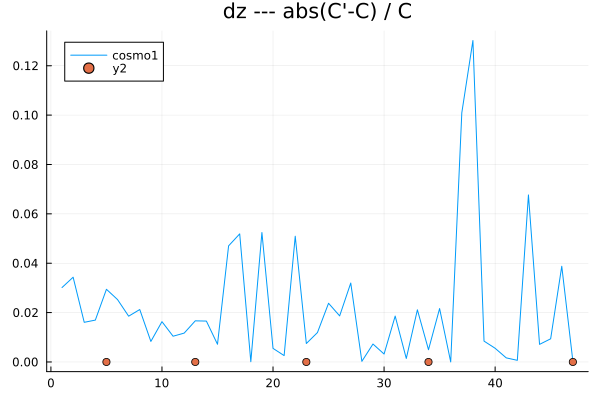

In [27]:
plot(abs.(diag(gcgc_meta.cov) .- diag(C_mod)) ./ diag(gcgc_meta.cov), label="cosmo1", title="dz --- abs(C'-C) / C")
plot!([5, 13, 23, 34, 47], [0, 0, 0, 0, 0], seriestype=:scatter)


In [28]:
npzwrite("../../data/DESY1/nzs/gcgc_dz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))

In [29]:
C_mod = make_Cmod_Nz_gc(cov_k0, cov_k1, cov_k2, cov_k3, cov_k4; cosmo=cosmo)
inv_C_mod = inv(C_mod);

40


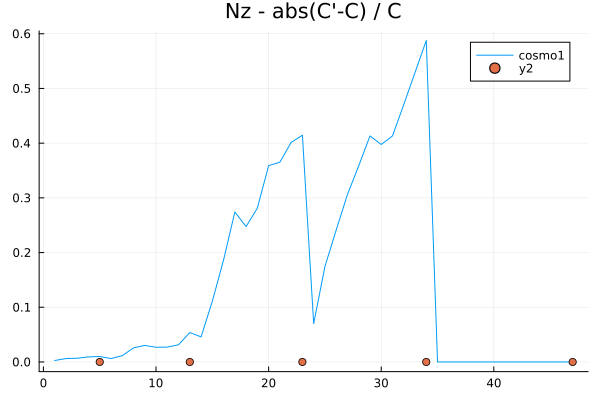

In [30]:
plot(abs.(diag(gcgc_meta.cov) .- diag(C_mod)) ./ diag(gcgc_meta.cov), label="cosmo1", title="Nz - abs(C'-C) / C")
plot!([5, 13, 23, 34, 47], [0, 0, 0, 0, 0], seriestype=:scatter)


In [31]:
npzwrite("../../data/DESY1/nzs/gcgc_nz_cov_marg.npz",
        Dict("cov_marg" => C_mod,
             "inv_cov_marg" => inv_C_mod))